## Introduction

As can be seen throughout this portofolio, all the algorithms kept running into the same problem. This problem was that the algorithm was not able/found it very hard to predict the outer (extreme) classes. The classes with the grades 3,4 and 8. The main reason for this is probably the amount of data compared to the other classes. This makes the accomplishment of near 70% accuracy even more interesting. This research will investigate if there is a solution to this problem for this dataset and if even higher results are possible.  

The first solution will be to try and level out the data throughout the classes. All classes will have the same amount of samples. Reducing the amount of samples could cause the problem of not having enough data to make good predictions, but results will show.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Load data
import pandas as pd

def load_wine_data():
    csv_path = os.path.join(r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL", "wine.csv")
    return pd.read_csv(csv_path)

def score(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    acc_score = accuracy_score(Y_true, Y_pred)
    prec_score = precision_score(Y_true, Y_pred, average=None, zero_division=1)
    rec_score = recall_score(Y_true, Y_pred, average=None, zero_division=1)
    F_score = f1_score(Y_true, Y_pred, average=None, zero_division=1)
    
    
    print(conf_mat)
    print("Accuracy score = ",acc_score)
    print("Precision score = ",prec_score)
    print("Recall score = ",rec_score)
    print("F measure = ",F_score)
    print(" ")
    return acc_score

wine = load_wine_data()
wine.describe()
wine.info()

Xtop7 = wine.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #Top 7 features
X = wine.iloc[:,1:11]
y = wine["quality"]  
score(y,y)
wine.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data
The table above shows the spreading of the samples around the classes. First a new data set will be made with each class having the same number of samples --> 6 classes of 10 samples.

In [2]:
def create_new_dataset(n, rs, rep): # n = number of samples per dataset, rs = randomstate, rep = replace(True/False)
    C3 = wine[wine["quality"] == 3]
    C4 = wine[wine["quality"] == 4]
    C5 = wine[wine["quality"] == 5]
    C6 = wine[wine["quality"] == 6]
    C7 = wine[wine["quality"] == 7]
    C8 = wine[wine["quality"] == 8]

    samp_C3 = C3.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C4 = C4.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C5 = C5.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C6 = C6.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C7 = C7.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C8 = C8.sample(n=n, replace=rep, random_state = rs, ignore_index=True)

    new_wine = pd.DataFrame(samp_C3, columns=wine.columns)
    new_wine = new_wine.append(samp_C4, ignore_index=True)
    new_wine = new_wine.append(samp_C5, ignore_index=True)
    new_wine = new_wine.append(samp_C6, ignore_index=True)
    new_wine = new_wine.append(samp_C7, ignore_index=True)
    new_wine = new_wine.append(samp_C8, ignore_index=True)
    return new_wine
    
new_wine = create_new_dataset(10, 2, False)

In [3]:
new_wine.describe

<bound method NDFrame.describe of     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             8.3             1.020         0.02            3.40      0.084   
1            10.4             0.610         0.49            2.10      0.200   
2             7.6             1.580         0.00            2.10      0.137   
3            11.6             0.580         0.66            2.20      0.074   
4             7.3             0.980         0.05            2.10      0.061   
5             7.4             1.185         0.00            4.25      0.097   
6            10.4             0.440         0.42            1.50      0.145   
7             6.8             0.815         0.00            1.20      0.267   
8             6.7             0.760         0.02            1.80      0.078   
9             7.1             0.875         0.05            5.70      0.082   
10            6.5             0.670         0.00            4.30      0.057   
11            8.1 

In [4]:
X_new_top7 = new_wine.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #Top 7 features
X_new = new_wine.iloc[:,1:11]
y_new = new_wine["quality"]  
score(y_new,y_new)

[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
 


1.0

## Algorithms
Using the algorithms that gave the best results we will now check if this even distribution causes the algorithms to make better predictions.

### Decision trees

In [5]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size=0.35, random_state=42)


In [6]:
def Decision_Tree(X_train, X_test, y_train, y_test):
    tree_dtc_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion="gini", min_samples_leaf=10)
    tree_dtc_clf.fit(X_train, y_train)
    y_pred_train_dtc = tree_dtc_clf.predict(X_train)
    y_pred_test_dtc = tree_dtc_clf.predict(X_test)

    print("Train")
    score(y_train,y_pred_train_dtc)
    print(" ")
    print("Test")
    return score(y_test,y_pred_test_dtc)
    
Decision_Tree(X_train, X_test, y_train, y_test)

Train
[[3 0 0 0 0 0]
 [3 0 0 0 0 0]
 [2 0 4 0 0 0]
 [1 0 2 0 0 0]
 [0 0 4 0 0 0]
 [1 0 1 0 0 0]]
Accuracy score =  0.3333333333333333
Precision score =  [0.3        1.         0.36363636 1.         1.         1.        ]
Recall score =  [1.         0.         0.66666667 0.         0.         0.        ]
F measure =  [0.46153846 0.         0.47058824 0.         0.         0.        ]
 
 
Test
[[6 0 1 0 0 0]
 [6 0 1 0 0 0]
 [1 0 3 0 0 0]
 [3 0 4 0 0 0]
 [1 0 5 0 0 0]
 [0 0 8 0 0 0]]
Accuracy score =  0.23076923076923078
Precision score =  [0.35294118 1.         0.13636364 1.         1.         1.        ]
Recall score =  [0.85714286 0.         0.75       0.         0.         0.        ]
F measure =  [0.5        0.         0.23076923 0.         0.         0.        ]
 


0.23076923076923078

In [7]:
def Random_forest(X_train, X_test, y_train, y_test):   
    tree_rfc_clf = RandomForestClassifier(max_depth=10, random_state=42, criterion="gini", min_samples_leaf=10)
    tree_rfc_clf.fit(X_train, y_train)
    y_pred_train_rfc = tree_rfc_clf.predict(X_train)
    y_pred_test_rfc = tree_rfc_clf.predict(X_test)
    print("Train")
    score(y_train,y_pred_train_rfc)
    print(" ")
    print("Test")
    return(score(y_test,y_pred_test_rfc))
    
Random_forest(X_train, X_test, y_train, y_test)

Train
[[0 0 3 0 0 0]
 [0 0 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 3 0 0 0]
 [0 0 4 0 0 0]
 [0 0 2 0 0 0]]
Accuracy score =  0.2857142857142857
Precision score =  [1.         1.         0.28571429 1.         1.         1.        ]
Recall score =  [0. 0. 1. 0. 0. 0.]
F measure =  [0.         0.         0.44444444 0.         0.         0.        ]
 
 
Test
[[0 0 7 0 0 0]
 [0 0 7 0 0 0]
 [0 0 4 0 0 0]
 [0 0 7 0 0 0]
 [0 0 6 0 0 0]
 [0 0 8 0 0 0]]
Accuracy score =  0.10256410256410256
Precision score =  [1.        1.        0.1025641 1.        1.        1.       ]
Recall score =  [0. 0. 1. 0. 0. 0.]
F measure =  [0.         0.         0.18604651 0.         0.         0.        ]
 


0.10256410256410256

### Neural Networks

In [8]:
from sklearn.linear_model import LogisticRegression
def Logistic_reg(X_train, X_test, y_train, y_test):
    softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=10000)
    softmax_reg.fit(X_train, y_train)

    y_pred_train_nn = softmax_reg.predict(X_train)
    y_pred_test_nn = softmax_reg.predict(X_test)
    print("Train")
    score(y_train,y_pred_train_nn)
    print(" ")
    print("Test")
    return(score(y_test,y_pred_test_nn))
    
Logistic_reg(X_train, X_test, y_train, y_test)

Train
[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 5 1 0 0]
 [1 0 0 2 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 2]]
Accuracy score =  0.9047619047619048
Precision score =  [0.75       1.         1.         0.66666667 1.         1.        ]
Recall score =  [1.         1.         0.83333333 0.66666667 1.         1.        ]
F measure =  [0.85714286 1.         0.90909091 0.66666667 1.         1.        ]
 
 
Test
[[2 2 2 0 0 1]
 [1 2 2 1 0 1]
 [1 0 0 0 1 2]
 [0 1 1 2 3 0]
 [0 2 0 4 0 0]
 [0 0 0 2 5 1]]
Accuracy score =  0.1794871794871795
Precision score =  [0.5        0.28571429 0.         0.22222222 0.         0.2       ]
Recall score =  [0.28571429 0.28571429 0.         0.28571429 0.         0.125     ]
F measure =  [0.36363636 0.28571429 0.         0.25       0.         0.15384615]
 


0.1794871794871795

In [9]:
from sklearn.neural_network import MLPClassifier
def MLP_class(X_train, X_test, y_train, y_test):
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation="tanh", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    print("Train")
    print(mlp_clf.score(X_train, y_train))
    print(" ")
    print("Test")
    return mlp_clf.score(X_test, y_test)
MLP_class(X_train, X_test, y_train, y_test)

Train
1.0
 
Test


0.1794871794871795

In [10]:
def tests(X_train, X_test, y_train, y_test):
    tests = ["Decision Tree","Random Forest","Logistic Regression","MLP classifier"]
    results = []
    print("Decision Tree")
    results.append(Decision_Tree(X_train, X_test, y_train, y_test))
    print("Random Forest")
    results.append(Random_forest(X_train, X_test, y_train, y_test))
    print("Logistic Regression")
    results.append(Logistic_reg(X_train, X_test, y_train, y_test))
    print("MLP classifier")
    results.append(MLP_class(X_train, X_test, y_train, y_test))
    
    plt.figure(figsize=(8, 3.5))
    plt.plot(tests, results, "bo-")
    plt.xlabel("Tests", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.show()   

### Conclusion 1
This first test clearly shows there is not enough data to make decent predictions. To continue this reasearch and try to get better results. The following will be done: 
* Leave grade three out and try with 18 samples per class.
* Increase the amount of samples by doubling certain samples.
* Run through some random states

### Leave the samples graded with 3 out, so every other class can have 18 samples.


In [11]:
def create_new_dataset_without_3(n, rs, rep): # n = number of samples per dataset, rs = randomstate, rep = replace(True/False)
    #C3 = wine[wine["quality"] == 3]
    C4 = wine[wine["quality"] == 4]
    C5 = wine[wine["quality"] == 5]
    C6 = wine[wine["quality"] == 6]
    C7 = wine[wine["quality"] == 7]
    C8 = wine[wine["quality"] == 8]

    #samp_C3 = C3.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C4 = C4.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C5 = C5.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C6 = C6.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C7 = C7.sample(n=n, replace=rep, random_state = rs, ignore_index=True)
    samp_C8 = C8.sample(n=n, replace=rep, random_state = rs, ignore_index=True)

    new_wine = pd.DataFrame(samp_C4, columns=wine.columns)
    #new_wine = new_wine.append(samp_C4, ignore_index=True)
    new_wine = new_wine.append(samp_C5, ignore_index=True)
    new_wine = new_wine.append(samp_C6, ignore_index=True)
    new_wine = new_wine.append(samp_C7, ignore_index=True)
    new_wine = new_wine.append(samp_C8, ignore_index=True)
    return new_wine
    
new_wine_without_3 = create_new_dataset_without_3(18, 2, False)
X_new_top7_without_3 = new_wine_without_3.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #Top 7 features
X_new_without_3 = new_wine_without_3.iloc[:,1:11]
y_new_without_3 = new_wine_without_3["quality"]  
score(y_new_without_3,y_new_without_3)

[[18  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 18]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1.]
 


1.0

Decision Tree
Train
[[4 0 0 0 0]
 [4 0 0 0 1]
 [3 0 0 0 4]
 [2 0 0 0 5]
 [0 0 0 0 8]]
Accuracy score =  0.3870967741935484
Precision score =  [0.30769231 1.         1.         1.         0.44444444]
Recall score =  [1. 0. 0. 0. 1.]
F measure =  [0.47058824 0.         0.         0.         0.61538462]
 
 
Test
[[12  0  0  0  2]
 [ 9  0  0  0  4]
 [ 7  0  0  0  4]
 [ 1  0  0  0 10]
 [ 1  0  0  0  9]]
Accuracy score =  0.3559322033898305
Precision score =  [0.4        1.         1.         1.         0.31034483]
Recall score =  [0.85714286 0.         0.         0.         0.9       ]
F measure =  [0.54545455 0.         0.         0.         0.46153846]
 
Random Forest
Train
[[0 0 1 2 1]
 [0 0 0 3 2]
 [0 0 2 1 4]
 [0 0 0 3 4]
 [0 0 0 0 8]]
Accuracy score =  0.41935483870967744
Precision score =  [1.         1.         0.66666667 0.33333333 0.42105263]
Recall score =  [0.         0.         0.28571429 0.42857143 1.        ]
F measure =  [0.         0.         0.4        0.375      0.5925925

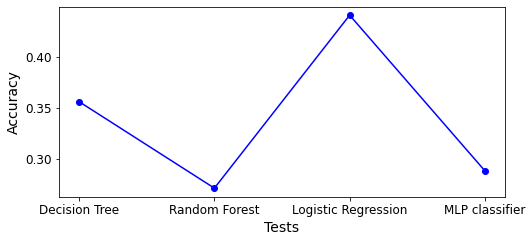

In [12]:
X_train_w3, X_test_w3, y_train_w3, y_test_w3 = train_test_split(X_new_without_3, y_new_without_3, train_size=0.35, random_state=42)
tests(X_train_w3, X_test_w3, y_train_w3, y_test_w3)

Decision Tree
Train
[[4 0 0 0 0]
 [4 0 0 0 1]
 [3 0 0 0 4]
 [2 0 0 0 5]
 [0 0 0 0 8]]
Accuracy score =  0.3870967741935484
Precision score =  [0.30769231 1.         1.         1.         0.44444444]
Recall score =  [1. 0. 0. 0. 1.]
F measure =  [0.47058824 0.         0.         0.         0.61538462]
 
 
Test
[[12  0  0  0  2]
 [ 9  0  0  0  4]
 [ 7  0  0  0  4]
 [ 1  0  0  0 10]
 [ 1  0  0  0  9]]
Accuracy score =  0.3559322033898305
Precision score =  [0.4        1.         1.         1.         0.31034483]
Recall score =  [0.85714286 0.         0.         0.         0.9       ]
F measure =  [0.54545455 0.         0.         0.         0.46153846]
 
Random Forest
Train
[[0 2 0 0 2]
 [0 3 0 2 0]
 [0 0 0 0 7]
 [0 1 0 2 4]
 [0 0 0 1 7]]
Accuracy score =  0.3870967741935484
Precision score =  [1.   0.5  1.   0.4  0.35]
Recall score =  [0.         0.6        0.         0.28571429 0.875     ]
F measure =  [0.         0.54545455 0.         0.33333333 0.5       ]
 
 
Test
[[ 0  5  5  1  3]
 

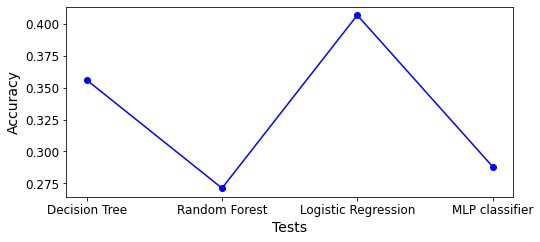

In [13]:
X_train_top_w3, X_test_top_w3, y_train_top_w3, y_test_top_w3 = train_test_split(X_new_top7_without_3, y_new_without_3, train_size=0.35, random_state=42)
tests(X_train_top_w3, X_test_top_w3, y_train_top_w3, y_test_top_w3)

### Conclusion 2
This second test gave interesting results, the accuracy was already a lot higher than in the first test. Logistic regression worked the best in this case, together with using all input parameters it got to 44%. This is a great score considering we are only using 18 samples per class. As can be seen in the confusion matrix the classes are predicted quite and the outer classes are very much in the game.

### Get more samples per class by duplicating some samples in the classes with fewer samples

In [14]:
new_wine_53 = create_new_dataset(53, 2, True)
X_new_top7_53 = new_wine_53.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #Top 7 features
X_new_53 = new_wine_53.iloc[:,1:11]
y_new_53 = new_wine_53["quality"]  
score(y_new_53,y_new_53)

[[53  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 53  0  0]
 [ 0  0  0  0 53  0]
 [ 0  0  0  0  0 53]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
 


1.0

Decision Tree
Train
[[18  1  0  2  0  0]
 [ 6  7  1  4  0  0]
 [ 0  2  8  5  0  0]
 [ 1  2  0  8  3  3]
 [ 0  0  0  6  7  8]
 [ 0  0  1  0  0 18]]
Accuracy score =  0.5945945945945946
Precision score =  [0.72       0.58333333 0.8        0.32       0.7        0.62068966]
Recall score =  [0.85714286 0.38888889 0.53333333 0.47058824 0.33333333 0.94736842]
F measure =  [0.7826087  0.46666667 0.64       0.38095238 0.4516129  0.75      ]
 
 
Test
[[24  5  0  3  0  0]
 [11 13  4  4  2  1]
 [ 5  8 11  8  6  0]
 [ 2  3  6 11  7  7]
 [ 0  1  1 10  7 13]
 [ 0  0  4  0  3 27]]
Accuracy score =  0.4492753623188406
Precision score =  [0.57142857 0.43333333 0.42307692 0.30555556 0.28       0.5625    ]
Recall score =  [0.75       0.37142857 0.28947368 0.30555556 0.21875    0.79411765]
F measure =  [0.64864865 0.4        0.34375    0.30555556 0.24561404 0.65853659]
 
Random Forest
Train
[[19  0  2  0  0  0]
 [ 8  6  3  1  0  0]
 [ 0  2 12  0  1  0]
 [ 1  1  0  5  7  3]
 [ 1  0  1  0 12  7]
 [ 0  0  0  

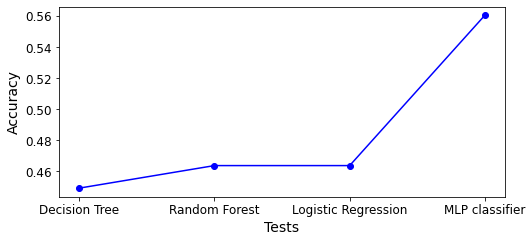

In [15]:
X_train_53, X_test_53, y_train_53, y_test_53 = train_test_split(X_new_53, y_new_53, train_size=0.35, random_state=42)
tests(X_train_53, X_test_53, y_train_53, y_test_53)

In [16]:
new_wine_200 = create_new_dataset(200, 2, True)
X_new_top7_200 = new_wine_200.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #Top 7 features
X_new_200 = new_wine_200.iloc[:,1:11]
y_new_200 = new_wine_200["quality"]  
score(y_new_200,y_new_200)

[[200   0   0   0   0   0]
 [  0 200   0   0   0   0]
 [  0   0 200   0   0   0]
 [  0   0   0 200   0   0]
 [  0   0   0   0 200   0]
 [  0   0   0   0   0 200]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
 


1.0

Decision Tree
Train
[[67  4  0  0  0  0]
 [ 6 43  5  4  3  0]
 [ 5  3 38  9  1  1]
 [ 1 12  9 40  7  9]
 [ 2  7  5  5 45  9]
 [ 7  0  4  1  3 65]]
Accuracy score =  0.7095238095238096
Precision score =  [0.76136364 0.62318841 0.62295082 0.6779661  0.76271186 0.77380952]
Recall score =  [0.94366197 0.70491803 0.66666667 0.51282051 0.61643836 0.8125    ]
F measure =  [0.8427673  0.66153846 0.6440678  0.58394161 0.68181818 0.79268293]
 
 
Test
[[116  13   0   0   0   0]
 [ 28  72  21  13   5   0]
 [ 16  31  49  41   5   1]
 [  8  12  29  37  21  15]
 [  3  24   9  13  52  26]
 [  7   0  11   3   5  94]]
Accuracy score =  0.5384615384615384
Precision score =  [0.65168539 0.47368421 0.41176471 0.34579439 0.59090909 0.69117647]
Recall score =  [0.89922481 0.51798561 0.34265734 0.30327869 0.40944882 0.78333333]
F measure =  [0.75570033 0.49484536 0.3740458  0.3231441  0.48372093 0.734375  ]
 
Random Forest
Train
[[71  0  0  0  0  0]
 [ 6 48  2  1  4  0]
 [ 2  4 39  9  1  2]
 [ 2  4  6 51  9  

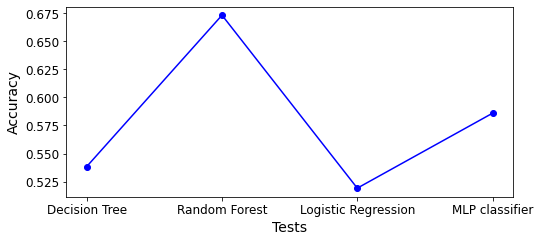

In [17]:
X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(X_new_200, y_new_200, train_size=0.35, random_state=42)
tests(X_train_200, X_test_200, y_train_200, y_test_200)

### Conclusion 3
Increasing the amount of samples did really increase the accuracy as can be seen above. Though this way of creating the data set does feel a bit like cheating because the algorithm will predict samples that it has already seen before. When splitting data before creating a dataset you would however get fewer different samples in the dataset, which in these would defenitely cause overfitting. Another interesting discovery is the changing of the most effective algorithm for the different dataset formats and sizes, some big differences as well.

### Vary the random_state when creating the data set
Changing the random_state in the dataset without class 3, so with 18 samples. This gave the best score in the fairest dataset split-up.

100
Decision Tree
Train
[[0 0 4 0 0]
 [0 0 2 0 3]
 [0 0 7 0 0]
 [0 0 1 0 6]
 [0 0 0 0 8]]
Accuracy score =  0.4838709677419355
Precision score =  [1.         1.         0.5        1.         0.47058824]
Recall score =  [0. 0. 1. 0. 1.]
F measure =  [0.         0.         0.66666667 0.         0.64      ]
 
 
Test
[[ 0  0 12  0  2]
 [ 0  0 10  0  3]
 [ 0  0  6  0  5]
 [ 0  0  3  0  8]
 [ 0  0  3  0  7]]
Accuracy score =  0.22033898305084745
Precision score =  [1.         1.         0.17647059 1.         0.28      ]
Recall score =  [0.         0.         0.54545455 0.         0.7       ]
F measure =  [0.         0.         0.26666667 0.         0.4       ]
 
Random Forest
Train
[[0 0 3 0 1]
 [0 0 2 1 2]
 [0 0 1 2 4]
 [0 0 0 3 4]
 [0 0 0 1 7]]
Accuracy score =  0.3548387096774194
Precision score =  [1.         1.         0.16666667 0.42857143 0.38888889]
Recall score =  [0.         0.         0.14285714 0.42857143 0.875     ]
F measure =  [0.         0.         0.15384615 0.42857143 0.538

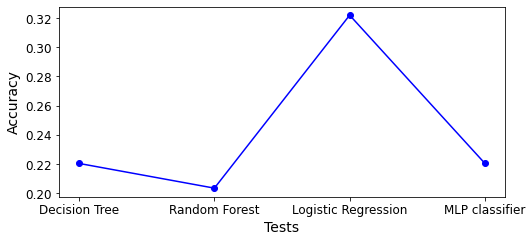

97
Decision Tree
Train
[[0 4 0 0 0]
 [0 5 0 0 0]
 [0 5 0 0 2]
 [0 0 0 0 7]
 [0 0 0 0 8]]
Accuracy score =  0.41935483870967744
Precision score =  [1.         0.35714286 1.         1.         0.47058824]
Recall score =  [0. 1. 0. 0. 1.]
F measure =  [0.         0.52631579 0.         0.         0.64      ]
 
 
Test
[[ 0 12  0  0  2]
 [ 0  6  0  0  7]
 [ 0  7  0  0  4]
 [ 0  0  0  0 11]
 [ 0  0  0  0 10]]
Accuracy score =  0.2711864406779661
Precision score =  [1.         0.24       1.         1.         0.29411765]
Recall score =  [0.         0.46153846 0.         0.         1.        ]
F measure =  [0.         0.31578947 0.         0.         0.45454545]
 
Random Forest
Train
[[0 0 2 0 2]
 [0 0 4 0 1]
 [0 0 4 0 3]
 [0 0 0 2 5]
 [0 0 0 0 8]]
Accuracy score =  0.45161290322580644
Precision score =  [1.         1.         0.4        1.         0.42105263]
Recall score =  [0.         0.         0.57142857 0.28571429 1.        ]
F measure =  [0.         0.         0.47058824 0.44444444 0.592

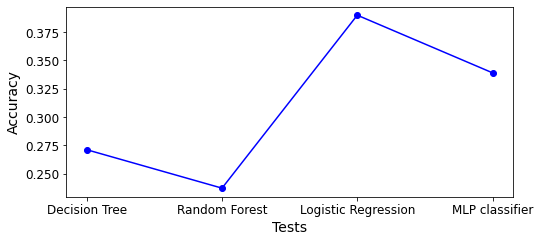

87
Decision Tree
Train
[[4 0 0 0 0]
 [0 5 0 0 0]
 [3 3 0 0 1]
 [2 2 0 0 3]
 [1 0 0 0 7]]
Accuracy score =  0.5161290322580645
Precision score =  [0.4        0.5        1.         1.         0.63636364]
Recall score =  [1.    1.    0.    0.    0.875]
F measure =  [0.57142857 0.66666667 0.         0.         0.73684211]
 
 
Test
[[8 3 0 0 3]
 [4 6 0 0 3]
 [2 3 0 0 6]
 [3 0 0 0 8]
 [1 1 0 0 8]]
Accuracy score =  0.3728813559322034
Precision score =  [0.44444444 0.46153846 1.         1.         0.28571429]
Recall score =  [0.57142857 0.46153846 0.         0.         0.8       ]
F measure =  [0.5        0.46153846 0.         0.         0.42105263]
 
Random Forest
Train
[[0 0 3 0 1]
 [0 0 4 0 1]
 [0 0 5 0 2]
 [0 0 1 1 5]
 [0 0 0 0 8]]
Accuracy score =  0.45161290322580644
Precision score =  [1.         1.         0.38461538 1.         0.47058824]
Recall score =  [0.         0.         0.71428571 0.14285714 1.        ]
F measure =  [0.   0.   0.5  0.25 0.64]
 
 
Test
[[ 0  0  4  1  9]
 [ 0  0

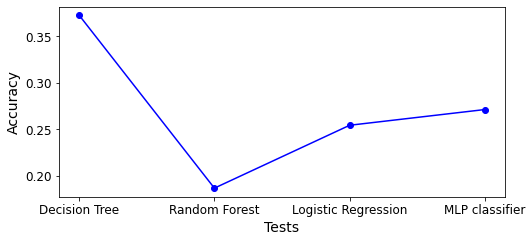

In [18]:
import random
def random_state(x):
    i = 0
    while i < x :
        r = random.randint(1, 100)
        print(r)
        new_wine_without_3 = create_new_dataset_without_3(18, r, False)
        X_new_without_3 = new_wine_without_3.iloc[:,1:11]
        y_new_without_3 = new_wine_without_3["quality"]  
        X_train_w3, X_test_w3, y_train_w3, y_test_w3 = train_test_split(X_new_without_3, y_new_without_3, train_size=0.35, random_state=42)
        tests(X_train_w3, X_test_w3, y_train_w3, y_test_w3)
        i += 1
        
random_state(3)

### Conclusion 4
No better scores were achieved by differing the random state, all similar or worse. Again an interesting fact that the best classifier changes with a different random_state. This could point that there is still not enough data to make a solid and constant prediction. As an overall conclusion, always try to get the classes represented evenly in the dataset. For this dataset can be concluded that it is not very suitable to classify new wines on their chemical properties. Earlier test show this is not just because to the class division but mainly due to the fact that the classification of wine is very much depending on the person who tastes it.